<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Dip-Lab/blob/main/Lab_dip_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

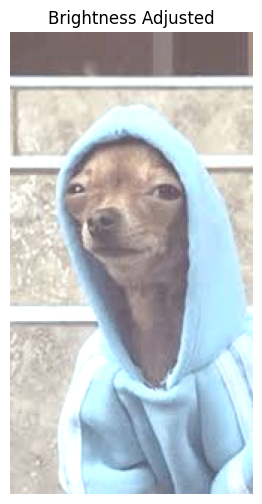

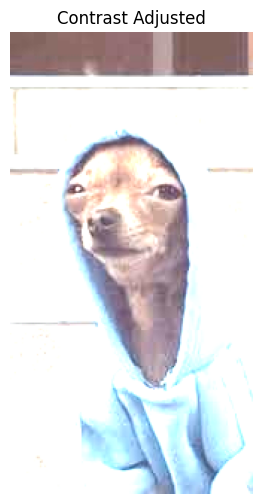

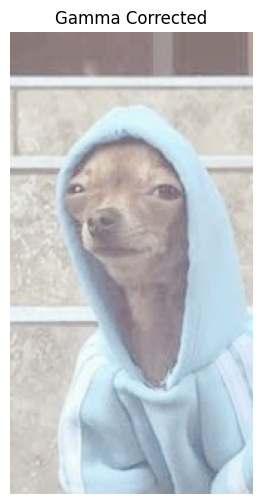

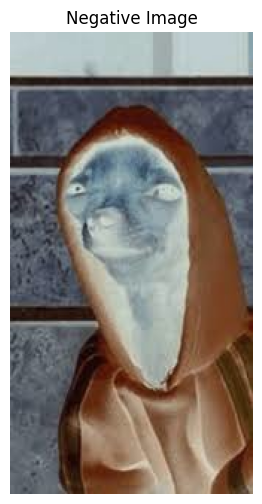

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title='Image', cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


image_path = '/content/images11.jpeg'
img = cv2.imread(image_path)

def adjust_brightness(img, brightness_value):
    bright_img = cv2.convertScaleAbs(img, beta=brightness_value)
    return bright_img

bright_img = adjust_brightness(img, 50)
show_image(bright_img, 'Brightness Adjusted')


def adjust_contrast(img, alpha, beta):
    contrast_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return contrast_img

contrast_img = adjust_contrast(img, 2.0, 0)
show_image(contrast_img, 'Contrast Adjusted')


def gamma_correction(img, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_img = gamma_correction(img, 2.2)
show_image(gamma_img, 'Gamma Corrected')


def inverse_image(img):
    inv_img = 255 - img
    return inv_img

negative_img = inverse_image(img)
show_image(negative_img, 'Negative Image')


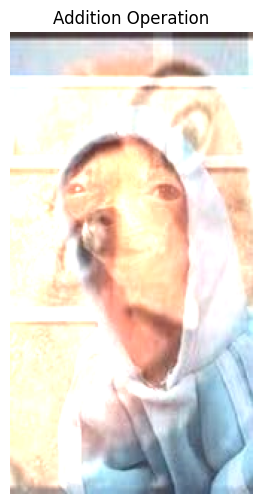

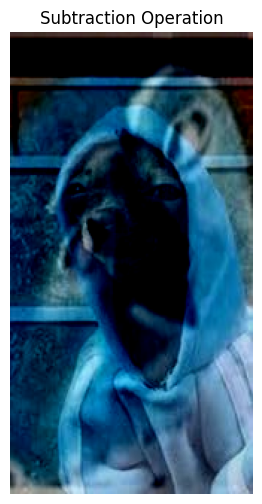

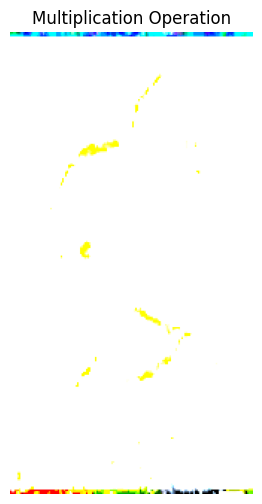

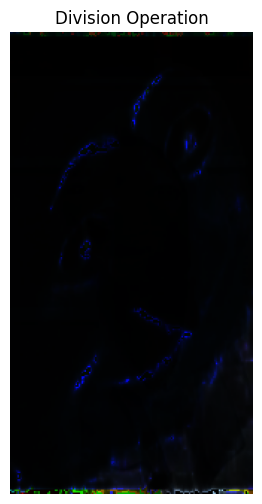

In [7]:
imagepath2 = '/content/unga bunga.jpeg'
img2 = cv2.imread(imagepath2)

img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))

add_img = cv2.add(img, img2)
show_image(add_img, 'Addition Operation')

subtract_img = cv2.subtract(img, img2)
show_image(subtract_img, 'Subtraction Operation')

multiply_img = cv2.multiply(img, img2)
show_image(multiply_img, 'Multiplication Operation')

div_img = cv2.divide(img, img2)
show_image(div_img, 'Division Operation')

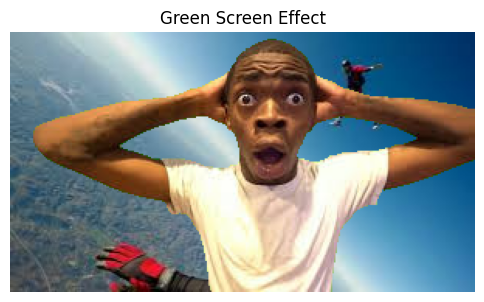

In [8]:

foreground_path = '/content/ub fr.jpeg'
background_path = '/content/ub_back.jpeg'

foreground = cv2.imread(foreground_path)
background = cv2.imread(background_path)

background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))

hsv_foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv_foreground, lower_green, upper_green)

mask_inv = cv2.bitwise_not(mask)

fg_part = cv2.bitwise_and(foreground, foreground, mask=mask_inv)

bg_part = cv2.bitwise_and(background, background, mask=mask)

final_image = cv2.add(fg_part, bg_part)

show_image(final_image, 'Green Screen Effect')
